In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [7]:
df = pd.read_csv("customer_reviews_full.csv")
df.head()


,review,sentiment
0,"Absolutely loved the product, works like a charm!",1
1,Terrible experience. The item broke within a day.,0
2,Fast delivery and great quality. Highly recomm...,1
3,Worst purchase I've ever made.,0
4,Very satisfied with the product and customer s...,1


Dataset Shape: (10, 2)

Class Distribution:
 sentiment
1    5
0    5
Name: count, dtype: int64


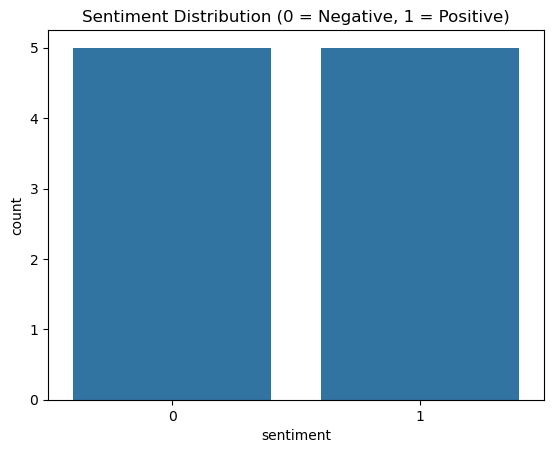

In [8]:
print("Dataset Shape:", df.shape)
print("\nClass Distribution:\n", df['sentiment'].value_counts())

# Visualize class distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution (0 = Negative, 1 = Positive)")
plt.show()


In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df['clean_review'] = df['review'].apply(clean_text)
df[['review', 'clean_review']].head()


,review,clean_review
0,"Absolutely loved the product, works like a charm!",absolutely loved the product works like a charm
1,Terrible experience. The item broke within a day.,terrible experience the item broke within a day
2,Fast delivery and great quality. Highly recomm...,fast delivery and great quality highly recommend
3,Worst purchase I've ever made.,worst purchase ive ever made
4,Very satisfied with the product and customer s...,very satisfied with the product and customer s...


In [10]:
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
tfidf = TfidfVectorizer(max_features=500)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [12]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



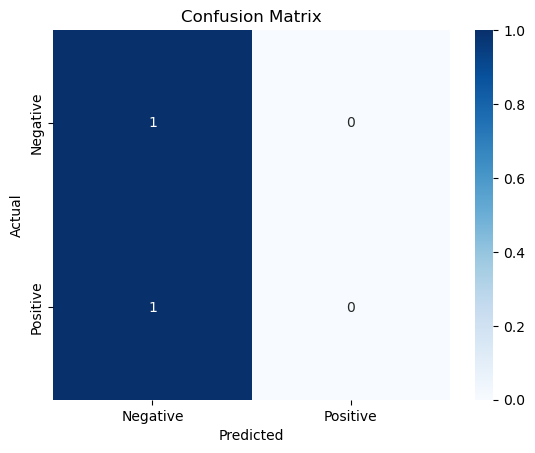

In [15]:
y_pred = model.predict(X_test_tfidf)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred, zero_division=0))


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [14]:
sample_reviews = ["The quality was amazing!", "I hate this product. Totally worthless."]
sample_cleaned = [clean_text(review) for review in sample_reviews]
sample_tfidf = tfidf.transform(sample_cleaned)
sample_preds = model.predict(sample_tfidf)

for review, pred in zip(sample_reviews, sample_preds):
    print(f"Review: {review} --> Sentiment: {'Positive' if pred == 1 else 'Negative'}")


Review: The quality was amazing! --> Sentiment: Positive
Review: I hate this product. Totally worthless. --> Sentiment: Positive
